In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
import seaborn as sns

# Visualizing

In [3]:
mat = sio.loadmat('data/ex7data2.mat')
data = pd.DataFrame(mat.get('X'), columns=['X1', 'X2'])
data.head()

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


D:\Python\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


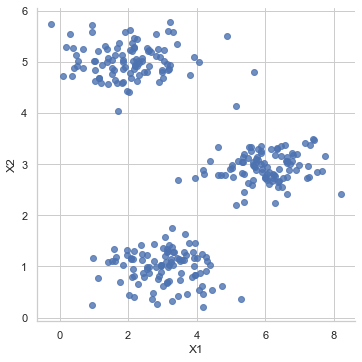

In [8]:
sns.set(context="notebook", style="whitegrid")
sns.lmplot('X1', 'X2', data=data, fit_reg=False)
plt.show()

In [13]:
def norm(x1, x2):
    x1 = np.matrix(x1)
    x2 = np.matrix(x2)
    return (x1 - x2) * (x1 - x2).T


In [30]:
def findClosestCentroids(X, C):
    X = np.matrix(X)
    C = np.matrix(C)
    m = len(X)
    k = len(C)
    idx = np.zeros(m)

    for i in range(m):
        distance = 100000
        for j in range(k):
            temp = norm(X[i], C[j])
            if temp < distance:
                distance = temp
                idx[i] = j
    
    return idx

In [37]:
C_test = [[6, 2], [4, 4], [1, 3]]
idx = findClosestCentroids(data, C_test)
print(idx[:10])

[2. 1. 0. 1. 1. 2. 2. 1. 1. 1.]


In [52]:
def computingCentroidMeans(X, C, idx):
    X = np.matrix(X)
    C = np.matrix(C)
    m = X.shape[1]
    k = len(C)
    avarage = np.zeros((k, m))

    for i in range(k):
        indices = np.where(idx == i)
        avarage[i, :] = (np.sum(X[indices, :], axis=1) / len(indices[0])).ravel()
    
    return avarage
    

In [53]:
computingCentroidMeans(data, C_test, idx)

array([[5.44153222, 2.32377581],
       [3.02507511, 4.68839407],
       [1.88184684, 2.81803207]])